# Naïve Bayes Classifier with Single Test Instance
This section will cover the implementation of the Naïve Bayes classifier where the entire dataset is used for training, and a new instance is used for testing.

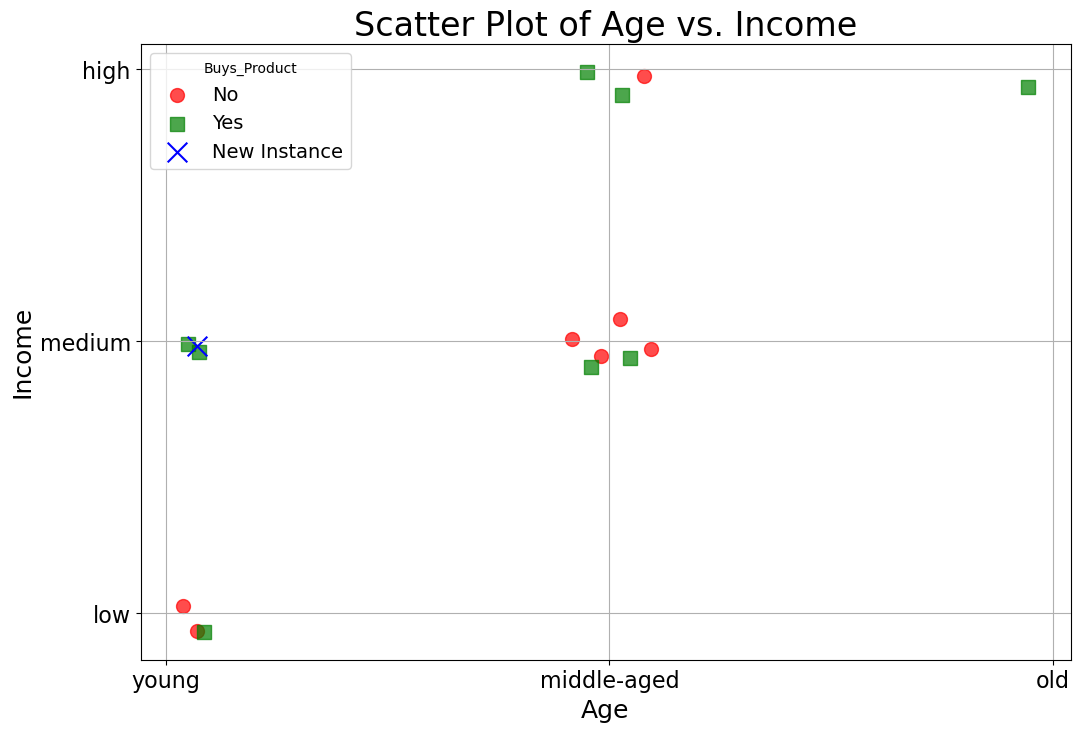

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Manually creating the DataFrame with the provided data
data = pd.DataFrame({
    'Age': ['young', 'middle-aged', 'middle-aged', 'young', 'young', 'young', 'middle-aged', 
            'middle-aged', 'middle-aged', 'old', 'young', 'middle-aged', 'middle-aged', 
            'middle-aged', 'middle-aged'],
    'Income': ['low', 'medium', 'medium', 'low', 'low', 'medium', 'medium', 'high', 
               'high', 'high', 'medium', 'medium', 'medium', 'medium', 'high'],
    'Buys_Product': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 
                     'Yes', 'No', 'Yes', 'No', 'Yes']
})

# Convert 'Buys_Product' to numerical for coloring and modeling
data['Buys_Product_Numeric'] = data['Buys_Product'].apply(lambda x: 1 if x == 'Yes' else 0)

# Mapping categorical values for 'Age' and 'Income'
age_mapping = {'young': 1, 'middle-aged': 2, 'old': 3}
income_mapping = {'low': 1, 'medium': 2, 'high': 3}

# Map the categorical values for 'Age' and 'Income'
data['Age_Mapped'] = data['Age'].map(age_mapping)
data['Income_Mapped'] = data['Income'].map(income_mapping)

# Apply jitter for better visualization
jitter_strength = 0.1
data['Age_Jittered'] = data['Age_Mapped'] + np.random.uniform(-jitter_strength, jitter_strength, size=data.shape[0])
data['Income_Jittered'] = data['Income_Mapped'] + np.random.uniform(-jitter_strength, jitter_strength, size=data.shape[0])

# Scatter plot to visualize data with jitter
plt.figure(figsize=(12, 8))
colors = {0: 'red', 1: 'green'}
markers = {0: 'o', 1: 's'}
labels = {0: 'No', 1: 'Yes'}
for label in labels:
    subset = data[data['Buys_Product_Numeric'] == label]
    plt.scatter(subset['Age_Jittered'], subset['Income_Jittered'], c=colors[label], marker=markers[label], label=labels[label], s=100, alpha=0.7)

# New instance for prediction
new_instance = {'Age': 'young', 'Income': 'medium'}
new_instance_mapped = {'Age_Mapped': age_mapping[new_instance['Age']], 'Income_Mapped': income_mapping[new_instance['Income']]}
new_instance_jittered = {'Age_Jittered': new_instance_mapped['Age_Mapped'] + np.random.uniform(-jitter_strength, jitter_strength),
                         'Income_Jittered': new_instance_mapped['Income_Mapped'] + np.random.uniform(-jitter_strength, jitter_strength)}
plt.scatter(new_instance_jittered['Age_Jittered'], new_instance_jittered['Income_Jittered'], c='blue', marker='x', s=200, label='New Instance')

# Setting axis labels and ticks
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.title('Scatter Plot of Age vs. Income', fontsize=24)
plt.legend(title='Buys_Product', fontsize=14)
plt.xticks([1, 2, 3], ['young', 'middle-aged', 'old'], fontsize=16)
plt.yticks([1, 2, 3], ['low', 'medium', 'high'], fontsize=16)
plt.grid(True)
plt.show()
